In [1]:
import numpy as np
ls = 2**13
data = np.fromfile('soliton.bin')
lt = np.shape(data)[0]//(3*ls)
# data = data.reshape(ls*lt, 3)
data = data.reshape(np.shape(data)[0]//3, 3)
radius = np.zeros((ls))
time = np.zeros((lt))
field = np.zeros((lt,ls))
for i in range ((lt)):
    time[i] = data[ls*i,0]
    
for i in range ((ls)):
    radius[i] = data[i,1]
    
for i in range ((lt)):
    for j in range ((ls)):
        field[i,j] = data[ls*i+j,2]        

In [2]:
print(time)

[1.0000e-03 2.0000e-03 3.0000e-03 ... 1.4010e+01 1.4011e+01 1.4012e+01]


In [3]:
print(field)

[[ 3.65916899e-12 -3.66306067e-12  3.66695629e-12 ... -3.64751575e-12
   3.65139561e-12 -3.65528039e-12]
 [ 4.29575290e-12 -4.30210790e-12  4.30846822e-12 ... -4.27672839e-12
   4.28306190e-12 -4.28940347e-12]
 [ 2.73156713e-12 -2.73765646e-12  2.74375118e-12 ... -2.71333915e-12
   2.71940792e-12 -2.72548385e-12]
 ...
 [-3.00023318e-16  3.05759629e-16 -3.03351463e-16 ...  3.02582012e-16
  -3.02188041e-16  3.03515882e-16]
 [-2.82352799e-16  2.87905269e-16 -2.85841088e-16 ...  2.83981479e-16
  -2.84047260e-16  2.85816616e-16]
 [-2.64249689e-16  2.69198839e-16 -2.66853318e-16 ...  2.65013885e-16
  -2.65392065e-16  2.67725151e-16]]


(400.0, 600.0)

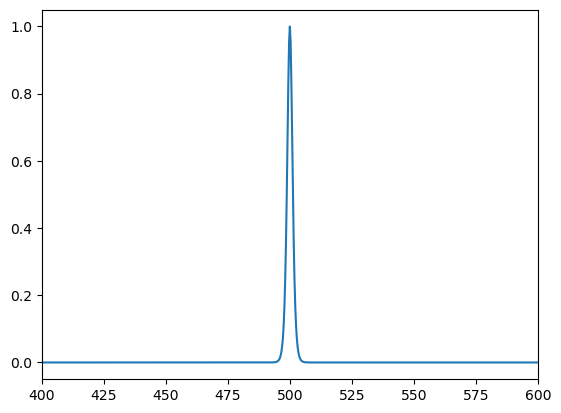

In [4]:
import matplotlib.pyplot as pl
pl.plot(radius[:], field[0,:])
pl.xlim(400,600)

(400.0, 600.0)

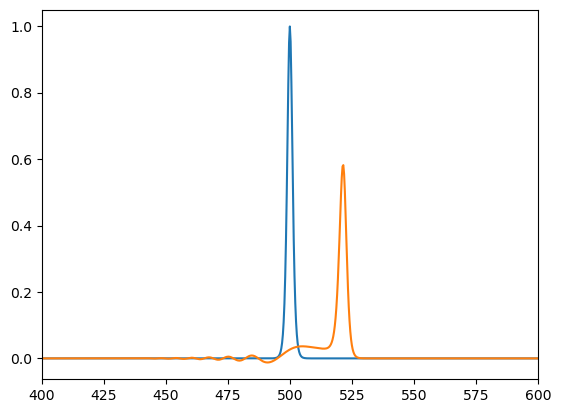

In [5]:
# for i in range(1000):
#     pl.plot(radius[:], field[i,:])
#     pl.xlim(400,600)
pl.plot(radius[:], field[1,:])
pl.plot(radius[:], field[lt-1,:])
pl.xlim(400,600)